In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## Data Exploration and Preprocessing

In [2]:
df = pd.read_csv(r'CC GENERAL.csv')

In [3]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [12]:
df.shape

(8950, 18)

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# handling missing values 
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mode()[0] , inplace=True)
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mode()[0] , inplace=True)

In [8]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
#Scaling the data 
from sklearn.preprocessing import normalize
data_scaled = normalize(df.drop("CUST_ID",axis=1))
data_scaled = pd.DataFrame(data_scaled, columns=df.drop("CUST_ID",axis=1).columns)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
3,0.208899,0.000080,0.187884,0.187884,0.00000,0.025793,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.940045,0.000000,0.037521,0.00000,0.001504
4,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400


## Hierarchical clustering

In [10]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [11]:
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete') #We choose k=5
labels=model.fit_predict(data_scaled)

### Plotting the labels 

In [13]:
data_scaled.shape

(8950, 17)

In [ ]:
from sklearn.decomposition import PCA

In [14]:
#Since the dataset contains 17 features, we can't plot it directly, we need to use PCA projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [15]:
principalDf

,principal component 1,principal component 2
0,-0.315189,-0.041452
1,0.318235,-0.161251
2,-0.207145,-0.180654
3,-0.292319,-0.112869
4,0.142373,-0.090949
...,...,...
8945,-0.287632,0.168162
8946,-0.232917,0.139404
8947,-0.387029,-0.057326
8948,-0.331982,-0.176895


In [81]:
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete') #We choose k=5
label=model.fit_predict(principalDf)
df_pca_ACluster = pd.concat([data_scaled.reset_index(drop=True) , pd.DataFrame(principalDf)],axis=1)
df_pca_ACluster['label'] = label
df_pca_ACluster 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,principal component 1,principal component 2,label
0,0.039353,0.000787,0.091790,0.000000,0.091790,0.000000,0.000160,0.000000,0.000080,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.000000,0.011546,-0.315189,-0.041452,2
1,0.293876,0.000083,0.000000,0.000000,0.000000,0.591240,0.000000,0.000000,0.000000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.000020,0.001101,0.318235,-0.161251,0
2,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.000000,0.001495,-0.207145,-0.180654,2
3,0.208899,0.000080,0.187884,0.187884,0.000000,0.025793,0.000010,0.000010,0.000000,0.000010,0.000125,0.000125,0.940045,0.000000,0.037521,0.000000,0.001504,-0.292319,-0.112869,2
4,0.504284,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.000000,0.007400,0.142373,-0.090949,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.025197,0.000884,0.257438,0.000000,0.257438,0.000000,0.000884,0.000000,0.000737,0.000000,0.000000,0.005306,0.884301,0.287924,0.043230,0.000442,0.005306,-0.287632,0.168162,4
8946,0.016534,0.000862,0.258567,0.000000,0.258567,0.000000,0.000862,0.000000,0.000718,0.000000,0.000000,0.005171,0.861892,0.237763,0.258009,0.000000,0.005171,-0.232917,0.139404,4
8947,0.022773,0.000811,0.140538,0.000000,0.140538,0.000000,0.000811,0.000000,0.000649,0.000000,0.000000,0.004866,0.973257,0.079097,0.080214,0.000243,0.005840,-0.387029,-0.057326,2
8948,0.026524,0.001642,0.000000,0.000000,0.000000,0.072055,0.000000,0.000000,0.000000,0.000328,0.003942,0.000000,0.985466,0.103572,0.109891,0.000493,0.011826,-0.331982,-0.176895,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


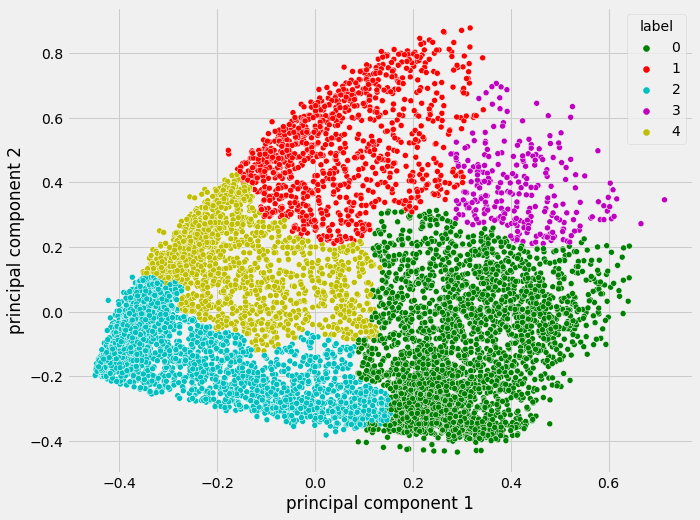

In [82]:
x_axis = df_pca_ACluster['principal component 1']
y_axis = df_pca_ACluster['principal component 2']

plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_pca_ACluster['label'], palette = ['g','r','c','m','y'])
plt.show()

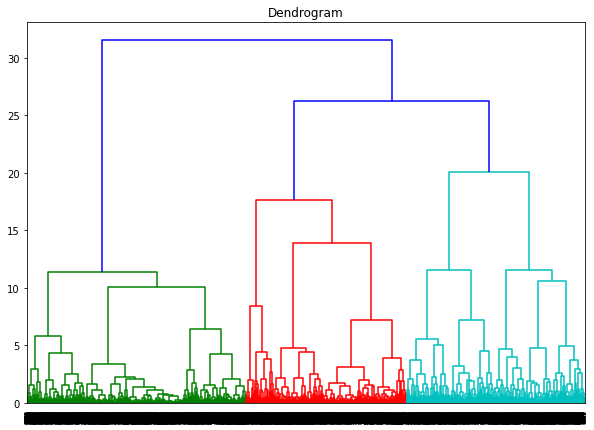

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

## K-means

In [69]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans= KMeans(n_clusters=5)  #Cluster our data by choosing 5 as number of clusters
labels = kmeans.fit(data_scaled)
labels = labels.labels_

### Finding the best K using the elbow method 

In [70]:
sse = []
r = range(1,30)
for k in r:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data_scaled)
  sse.append(kmeans.inertia_)

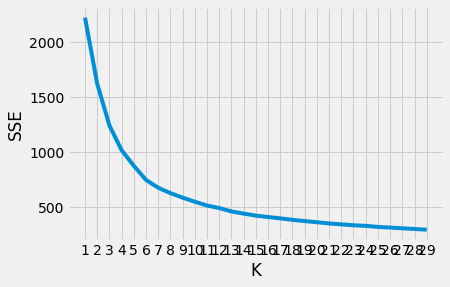

In [71]:
plt.style.use("fivethirtyeight")
plt.plot(r , sse)
plt.xticks(r)
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()

From above elbow plot, the point of inflection on the curve is when k=6. So we can choose k=6 as the optimal number of clusters (choosing k>6 does not worth the gain in SSE and can lead to overfitting)

In [ ]:
# We can also notice that by calculating the difference between the see for every two consecutive k 
for i in range(1,28) :
  print(i,"-",i+1," : ",sse[i]-sse[i+1])

1 - 2  :  377.79057660788635
2 - 3  :  224.73921920907628
3 - 4  :  141.00034757186165
4 - 5  :  128.40763393152133
5 - 6  :  70.75459101170975
6 - 7  :  48.951320970362076
7 - 8  :  40.611224188546544
8 - 9  :  37.741999027410316
9 - 10  :  34.2407186093327
10 - 11  :  32.282982880606255
11 - 12  :  20.847801894634756
12 - 13  :  19.043521839916934
13 - 14  :  19.092674413111695
14 - 15  :  14.918919072501978
15 - 16  :  10.649138623534327
16 - 17  :  14.847524764893365
17 - 18  :  8.769169683186306
18 - 19  :  10.84060492884015
19 - 20  :  11.25034746370494
20 - 21  :  8.887938425736593
21 - 22  :  7.825444090510359
22 - 23  :  7.0059117359286915
23 - 24  :  7.632386259881571
24 - 25  :  6.381878878080272
25 - 26  :  6.8383686375177035
26 - 27  :  5.230483495588828
27 - 28  :  4.403957292095072


In [ ]:
kmeans= KMeans(n_clusters=6)
labels = kmeans.fit(data_scaled)
labels = labels.labels_

### Plotting the labels 

In [72]:
#Since the dataset contains 17 features, we can't plot it directly, we need to use PCA projection to 2D
principalDf

,principal component 1,principal component 2
0,-0.315189,-0.041452
1,0.318235,-0.161251
2,-0.207145,-0.180654
3,-0.292319,-0.112869
4,0.142373,-0.090949
...,...,...
8945,-0.287632,0.168162
8946,-0.232917,0.139404
8947,-0.387029,-0.057326
8948,-0.331982,-0.176895


In [88]:
model=KMeans(n_clusters=6)
label=model.fit_predict(principalDf)
df_pca_kmeans = pd.concat([data_scaled.reset_index(drop=True) , pd.DataFrame(principalDf)],axis=1)
df_pca_kmeans['label'] = label

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


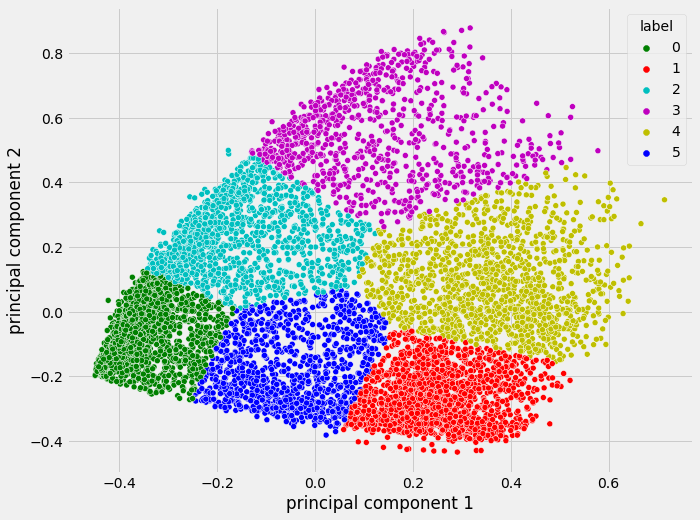

In [90]:
x_axis = df_pca_kmeans['principal component 1']
y_axis = df_pca_kmeans['principal component 2']

plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_pca_kmeans['label'], palette = ['g','r','c','m','y','b'],)
plt.show()

Comparison: <br>
By comparing the sse for the k-means clustering where k=5 and k=6, we notice that the sse is lesser and therefore better when k=6, but choosing a value of k higher than 6 is not worth it because the gain on the sse is not quite high, and doing that can lead to overfitting

## Comparison betweeen AgglomerativeClustering and K-means

Comparison  for the same k=6

In [86]:
AClustering=AgglomerativeClustering(n_clusters=6 , affinity='euclidean', linkage='complete')
label=AClustering.fit_predict(principalDf)
df_pca_ACluster = pd.concat([data_scaled.reset_index(drop=True) , pd.DataFrame(principalDf)],axis=1)
df_pca_ACluster['label'] = label

kmeans=KMeans(n_clusters=6)
label=kmeans.fit_predict(principalDf)
df_pca_kmeans = pd.concat([data_scaled.reset_index(drop=True) , pd.DataFrame(principalDf)],axis=1)
df_pca_kmeans['label'] = label

Text(0.5, 1.0, 'K-means')

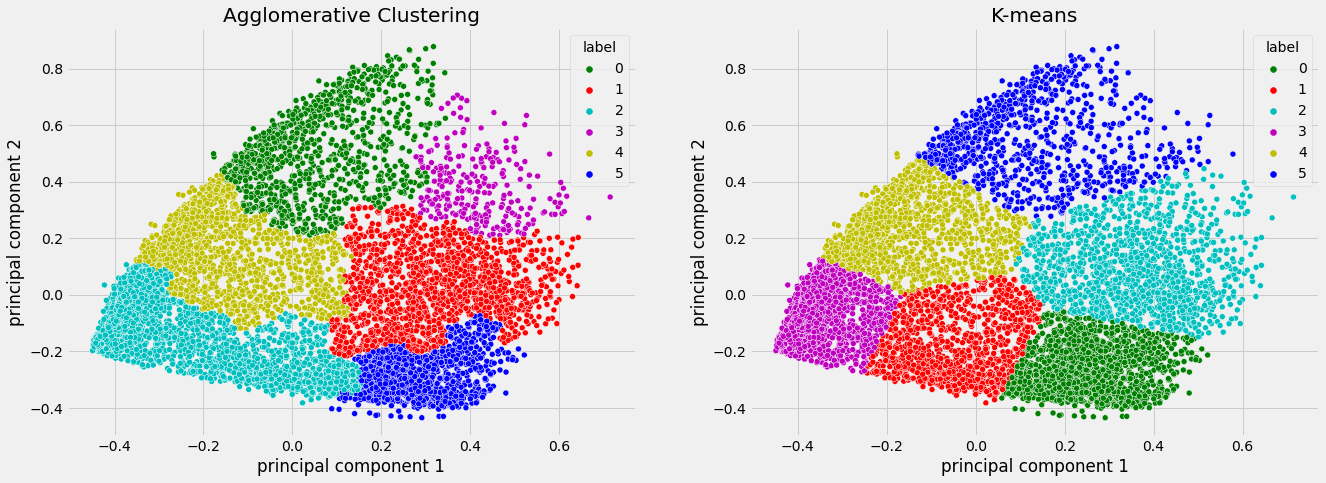

In [87]:
fig, axes = plt.subplots(1, 2 , figsize=(20, 7))
x_axis1 = df_pca_ACluster['principal component 1']
y_axis1 = df_pca_ACluster['principal component 2']

x_axis2 = df_pca_kmeans['principal component 1']
y_axis2 = df_pca_kmeans['principal component 2']

sns.scatterplot(ax=axes[0], x=x_axis1,y=y_axis1,hue=df_pca_ACluster['label'],palette = ['g','r','c','m','y','b'])
sns.scatterplot(ax=axes[1],x=x_axis2,y=y_axis2,hue=df_pca_kmeans['label'],palette = ['g','r','c','m','y','b'])

axes[0].set_title("Agglomerative Clustering")
axes[1].set_title("K-means")

We can see from the plot above that the two results are not identical and the two algorithms does not cluster the dataset the same way 

## Another validation metric : Silhouette Score

Silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. The higher the silhouette score is, the higher is the clusters density and the better separation is between clusters 

In [ ]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score for k-means (k=6): {silhouette_score(data_scaled, labels)}')

Silhouette Score for k-means (k=6): 0.36494996422612125


In [ ]:
for i in range(2,10) : 
  kmeans= KMeans(n_clusters=i)
  labels = kmeans.fit(data_scaled)
  labels1 = labels.labels_
  print(f'Silhouette Score for k-means (k={i}): {silhouette_score(data_scaled, labels1)}')
#The value of 6 for n_clusters looks to be the optimal one since the silhouette score is the higher

Silhouette Score for k-means (k=2): 0.2991902239171141
Silhouette Score for k-means (k=3): 0.3273240466780443
Silhouette Score for k-means (k=4): 0.3483469591087363
Silhouette Score for k-means (k=5): 0.364590122895131
Silhouette Score for k-means (k=6): 0.3649495419438503
Silhouette Score for k-means (k=7): 0.3279578809922737
Silhouette Score for k-means (k=8): 0.3089974743062211
Silhouette Score for k-means (k=9): 0.30650610443376697
